In [23]:
import numpy as np


def get_pagerank(adj_matrix, DAMPING_FACTOR=0.15, EPSILON=0.001):
    """[summary]
        pagerank values calculation
    Arguments:
        adj_matrix {[float[][]]} -- [[input Adjacent matrix lists like [[1, 0], [0, 1]]]
    Keyword Arguments:
        DAMPING_FACTOR {float} -- [factor of residual probability] (default: {0.15})
        EPSILON {float} -- [factor of change comparision] (default: {0.01})
    Returns:
        [float[]] -- [pagerank values]
    """

    # initialize
    page_length = adj_matrix.shape[0]
    pagerank = np.ones(page_length)
    new_pagerank = np.ones(page_length)
    escape = DAMPING_FACTOR / page_length

    # normalize
    normalize_adj_matrix = adj_matrix / np.linalg.norm(adj_matrix, ord=1, axis=1, keepdims=True)
    normalize_adj_matrix = np.nan_to_num(normalize_adj_matrix)
    is_coverage = False
    while not is_coverage:
        for node in range(page_length):
            single_rank = escape + (1-DAMPING_FACTOR) * np.dot(normalize_adj_matrix.T, new_pagerank)[node]
            new_pagerank[node] = single_rank

        # normalize pagerank
        normalize_pagerank = lambda x: x / sum(new_pagerank)
        new_pagerank = normalize_pagerank(new_pagerank)

        # check is coverage
        diff = abs(sum(new_pagerank - pagerank))

        if diff < EPSILON:
            is_coverage = True
        else:
            pagerank = new_pagerank.copy()

    return new_pagerank

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
import networkx as nx

In [6]:
main_df=pd.read_csv('/content/dataset.csv')

In [8]:
main_df.head()

,10,32
0,10,33
1,10,34
2,10,35
3,10,36
4,10,37


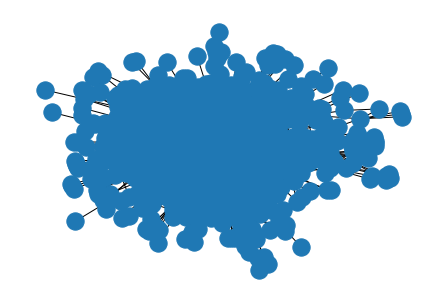

In [7]:
G=nx.Graph()
for i in range(len(main_df)):
  # G.add_node(main_df.iloc[i])
  G.add_edge(main_df.iloc[i,0],main_df.iloc[i,1])
nx.draw(G)

In [16]:
# 1475 Nodes in the First Column and 829 Users
print(len(main_df['10'].unique()))
# 829 Unique Users
unique_list=main_df['10'].unique()
unique_list

829


array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 19

In [ ]:
from numpy import genfromtxt
import numpy as np
mydata = genfromtxt('dataset.csv', delimiter=',')
print(mydata)
print(type(mydata))

[[10. 32.]
 [10. 33.]
 [10. 34.]
 ...
 [ 7. 29.]
 [ 8. 30.]
 [ 9. 31.]]
<class 'numpy.ndarray'>


In [10]:
# Get the Adjacency List from the Graph
for i in range(len(main_df)):
  # If the user is unique then add 

Graph with 829 nodes and 1474 edges


In [18]:
# There are 829 Users
# 829*829 0s ni bnaav
# Iterate over the main_df 
# Check for main_df.iloc[i,1]
# Check for main_df.iloc[i,2] 
# Multiply those Values 
# List['Product']=1 # Replace that element with 1



In [20]:
List1=[0]*687241
for i in range(len(main_df)):
  src=main_df.iloc[i,0]
  dest=main_df.iloc[i,1]
  prod=src*dest
  List1[prod]=1

In [21]:
List1=np.reshape(List1,(829,829))

In [22]:
List1

array([[0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
get_pagerank(List1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


array([0.00255901, 0.00724112, 0.00046199, 0.00047979, 0.00075508,
       0.00115256, 0.00074432, 0.00335997, 0.00198603, 0.0004236 ,
       0.00070478, 0.00194814, 0.00564766, 0.00046758, 0.00122869,
       0.00325213, 0.00320925, 0.00233416, 0.0047988 , 0.00042446,
       0.00052322, 0.00056602, 0.00270096, 0.00042244, 0.00367854,
       0.00162496, 0.00193286, 0.00158542, 0.00293224, 0.00391625,
       0.00068931, 0.00511648, 0.00096299, 0.00045945, 0.00382328,
       0.00042244, 0.0016752 , 0.00063882, 0.00046199, 0.00248932,
       0.00046199, 0.00048367, 0.00046315, 0.00042244, 0.00112177,
       0.00255592, 0.00055571, 0.0007328 , 0.00178854, 0.00151485,
       0.00241918, 0.0086064 , 0.00574657, 0.00057578, 0.00126562,
       0.00148134, 0.00059356, 0.00268001, 0.00042244, 0.00299659,
       0.00043058, 0.00861318, 0.00286767, 0.00042244, 0.00042244,
       0.000998  , 0.00044391, 0.00042244, 0.00043641, 0.00042244,
       0.00050382, 0.00363248, 0.00102752, 0.00057979, 0.00102